# Regressão Linear Simples

### O Pacote `palmerpenguins`

Informações aqui: [palmerpenguins](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/)

Caso não tenham instale o pacote com a função `install.packages("palmerpenguins")`

##### Carrega pacotes e define tamanho das figuras

In [36]:
library(tidyverse)
library(palmerpenguins)
options(repr.plot.width=6, repr.plot.height=4)

### Verificando o conjunto de dados

In [2]:
data(penguins)
#penguins

In [3]:
penguins %>% 
  distinct(species, island)

species,island
Adelie,Torgersen
Adelie,Biscoe
Adelie,Dream
Gentoo,Biscoe
Chinstrap,Dream


### Selecionando a espécie Gentoo

In [4]:
Gentoo = penguins %>% 
  filter(species == 'Gentoo') %>% 
  na.omit() 
#Gentoo

##### Análise exploratória

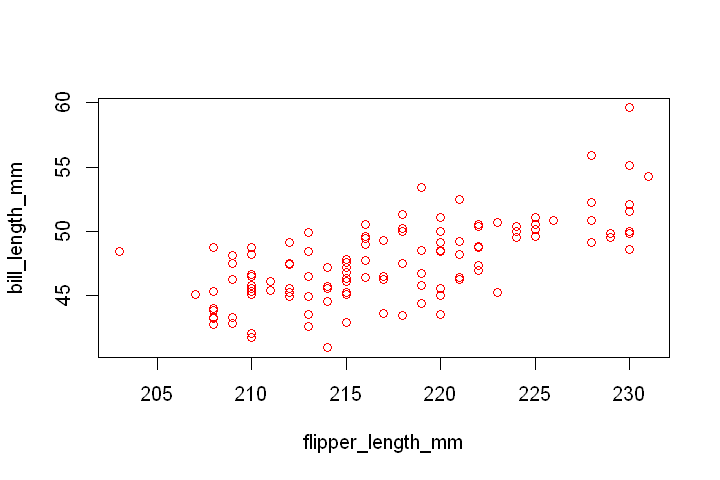

In [5]:
plot(bill_length_mm ~ flipper_length_mm, data = Gentoo, col =2)

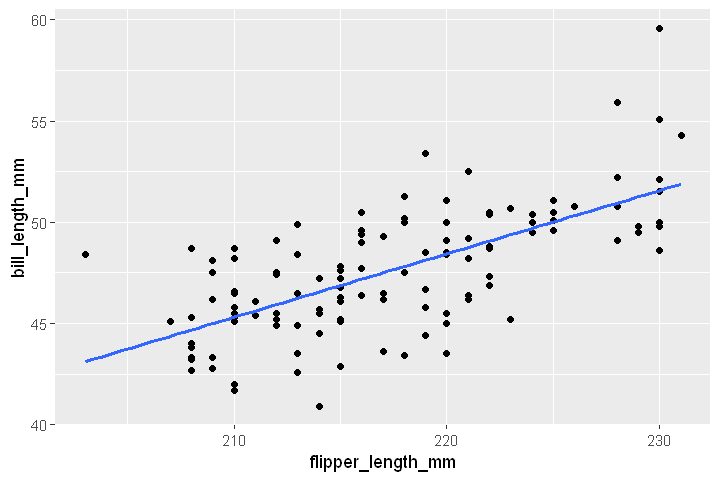

In [6]:
plt1 = ggplot(data = Gentoo, mapping = aes(x = flipper_length_mm, y = bill_length_mm)) +
    geom_point() +
    geom_smooth(method = 'lm', se = F)
plt1

### Regressão linear simples

$$Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$$

##### Função ```lm```

In [7]:
m1 = lm(bill_length_mm ~ flipper_length_mm, data = Gentoo)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Coefficients:
      (Intercept)  flipper_length_mm  
         -20.4879             0.3133  


Os valores de $\beta_0$ e $\beta_1$ podem ser obtidos ao digitar:

In [38]:
m1 


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Coefficients:
      (Intercept)  flipper_length_mm  
         -20.4879             0.3133  


Ou

In [39]:
coef(m1)

(Intercept) flipper_length_mm 
      -20.4878879         0.3132822

O quadrado médio dos resíduos ou variância residual pode ser obtida digitando o comando abaixo:

In [41]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
flipper_length_mm,1,502.2522,502.252212,92.36547,1.803166e-16
Residuals,117,636.2064,5.437662,NA,NA


O quadrado médio dos resíduos no exemplo acima estão na linha **Residuals** e na coluna **Mean Sq**

#### O valor predito

In [8]:
(beta0 = m1$coefficients[1])
(beta1 = m1$coefficients[2])

(Intercept) 
  -20.48789

flipper_length_mm 
        0.3132822

In [9]:
Xextra = 210
(bico_predito = beta0 + beta1 * Xextra)

(Intercept) 
   45.30138

(Intercept) 
    48.4342

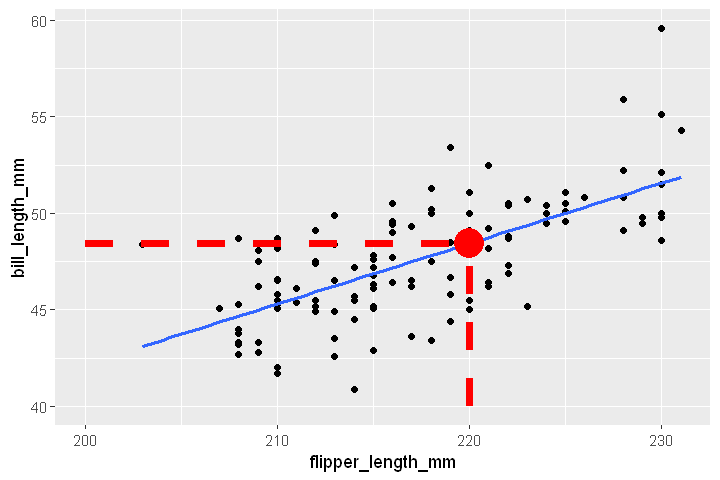

In [10]:
Xextra = 220
(bico_predito = beta0 + beta1 * Xextra)
plt1 +
    geom_point(aes(x = Xextra, y = bico_predito), colour="red", size = 8) +
    geom_segment(aes(x = 200, xend = Xextra, y = bico_predito, yend = bico_predito), linetype = 2, col = 2, size = 2) +
    geom_segment(aes(x = Xextra, xend = Xextra, y = 40, yend = bico_predito), linetype = 2, col = 2, size = 2)


### Extrapolando além dos valores observados

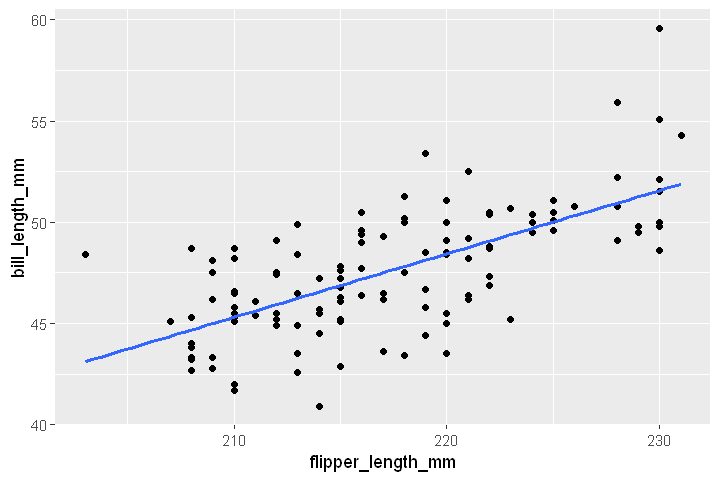

In [11]:
plt1# +
    #xlim(c(150, 290)) + ylim(c(30, 80)) +
    #geom_abline(intercept = beta0, slope = beta1, color = "red", linetype = 'dashed')


### Teste de hipóteses sobre $\beta's$

$H_0: \beta_1 = 0$

$H_a: \beta_1 \neq 0$

In [12]:
summary(m1)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6545 -1.5209 -0.0678  1.3123  8.0330 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -20.4879     7.0845  -2.892  0.00457 ** 
flipper_length_mm   0.3133     0.0326   9.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 117 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4364 
F-statistic: 92.37 on 1 and 117 DF,  p-value: < 2.2e-16


#### Teste t sobre o coeficiente de regressão $\beta_1$

$$t_{calculado} = \frac{\hat{\beta}_1 - \beta_1}{s_{\hat{\beta}_1}}$$

In [13]:
(beta1 = summary(m1)$coefficients[2,1])
(s_beta1 = summary(m1)$coefficients[2,2])
(BETA1 = 0)
(tc = (beta1 - BETA1) / s_beta1)
(gl = df.residual(m1))

pt(tc, df = gl, lower.tail = F) * 2

[1] 0.3132822

[1] 0.03259725

[1] 0

[1] 9.610696

[1] 117

[1] 1.803166e-16

### O que significa rejeitar $H_0: \beta_1 = 0$? - um pouco de simulação

Suponha uma população estatística com as seguintes características:

In [14]:
N = 10000
s_x = sd(Gentoo$flipper_length_mm)/1.96
BETA0 = mean(Gentoo$bill_length_mm)
BETA1 = 0
X = runif(N, min(Gentoo$flipper_length_mm), max(Gentoo$flipper_length_mm))
Y = rnorm(n = N, mean = BETA0 + BETA1 * X, sd = s_x)
df = data.frame(Y,X)
head(df)
dim(df)

Y,X
48.59108,203.0918
49.61512,225.5630
47.35019,209.5295
47.06523,217.8788
46.71595,218.2025
46.81725,212.7894


[1] 10000     2

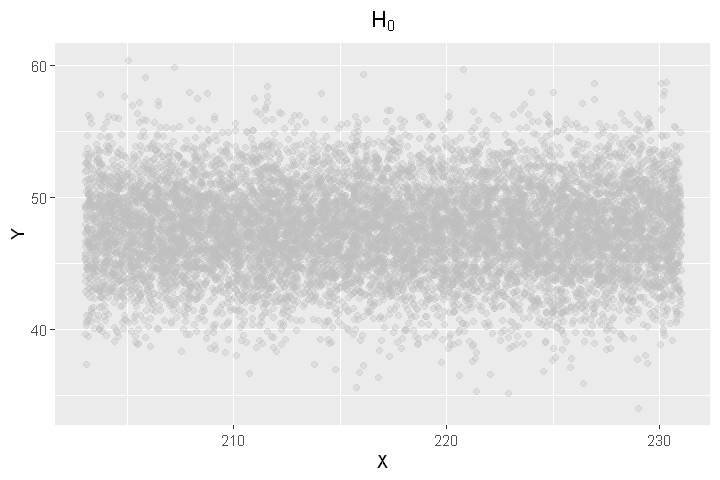

In [15]:
plt2 = ggplot(df, mapping = aes(x = X, y = Y)) +
    geom_point(alpha = 0.3, color = 'grey') +
    ggtitle(label = expression(H[0])) +
    theme(plot.title = element_text(hjust = 0.5))

plt2

O que esperar se tirarmos uma amostra **aleatória** desta população e fizermos uma regressão linear?

In [16]:
amostra = df %>% 
    sample_n(5)
amostra

Y,X
48.24157,211.7388
51.00457,208.8908
48.57680,217.7347
48.48441,225.6746
47.67533,229.1400


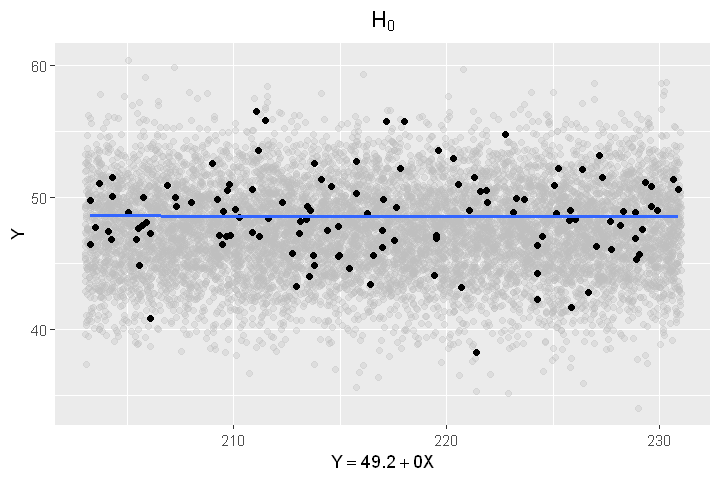

In [17]:
amostra = df %>% 
    sample_n(119)

m_sim = lm(Y ~ X, data = amostra)
b0a = as.numeric(summary(m_sim)$coefficients[1,1])
b1a = summary(m_sim)$coefficients[2,1]
texto = bquote(Y == .(round(b0a,1)) + .(round(b1a,2)) * X)

plt2 +
    geom_point(data = amostra, color = 1) +
    geom_smooth(data = amostra, method = 'lm', se = F) +
    xlab(texto)


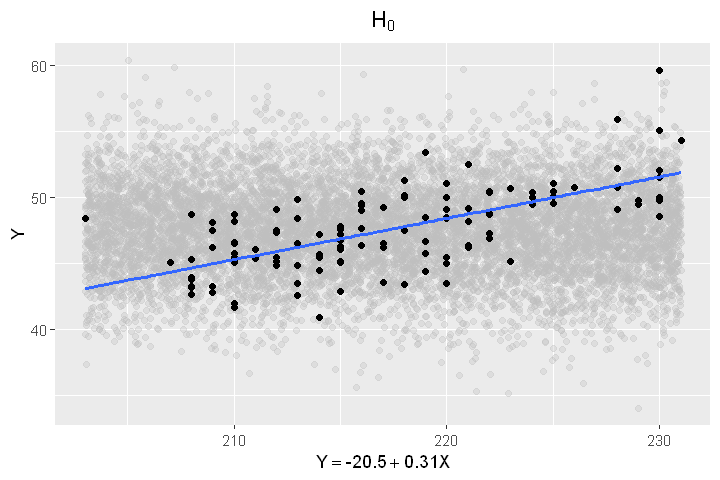

In [18]:
b0a = as.numeric(summary(m1)$coefficients[1,1])
b1a = summary(m1)$coefficients[2,1]
texto = bquote(Y == .(round(b0a,1)) + .(round(b1a,2)) * X)

plt2 +
    geom_point(data = Gentoo, mapping = aes(x = flipper_length_mm, y = bill_length_mm)) +
    geom_smooth(data = Gentoo, mapping = aes(x = flipper_length_mm, y = bill_length_mm), 
                method = 'lm', se = F) +
    xlab(texto)

### Partição da Soma dos Quadrados e coeficiente de determinação $R^2$

In [19]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
flipper_length_mm,1,502.2522,502.252212,92.36547,1.803166e-16
Residuals,117,636.2064,5.437662,NA,NA


In [20]:
summary(m1)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6545 -1.5209 -0.0678  1.3123  8.0330 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -20.4879     7.0845  -2.892  0.00457 ** 
flipper_length_mm   0.3133     0.0326   9.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 117 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4364 
F-statistic: 92.37 on 1 and 117 DF,  p-value: < 2.2e-16


In [21]:
9.611^2

[1] 92.37132

### Pressupostos da regressão linear simples 

1. Amostras independentes

2. O modelo linear descreve adequadamente a relação entre Y e X

3. Distribuição normal dos resíduos

4. Variância residual constante


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6545 -1.5209 -0.0678  1.3123  8.0330 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -20.4879     7.0845  -2.892  0.00457 ** 
flipper_length_mm   0.3133     0.0326   9.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 117 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4364 
F-statistic: 92.37 on 1 and 117 DF,  p-value: < 2.2e-16


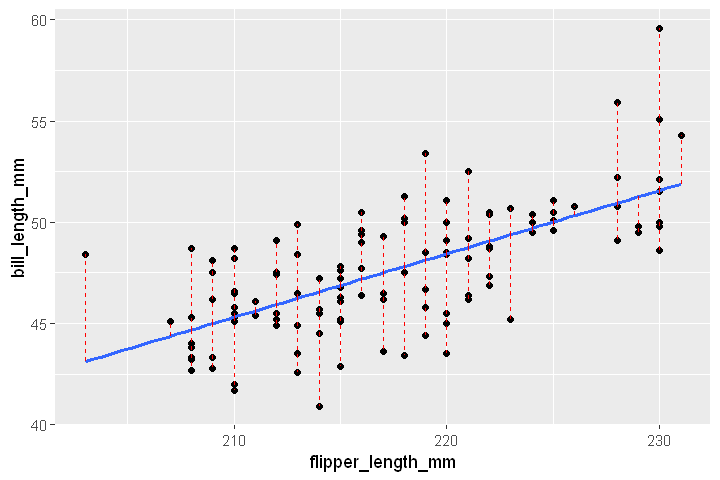

In [22]:
summary(m1)
plt1 +
    geom_segment(aes(x = flipper_length_mm, 
                     xend = flipper_length_mm, 
                     y = predict(m1), 
                     yend = bill_length_mm), color = 2, linetype = 2)

#### Linearidade e Variância $\sigma^2$ constante

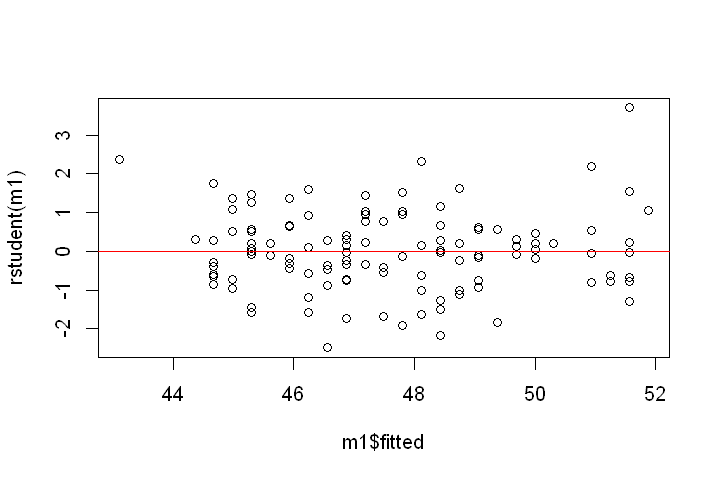

In [23]:
plot(rstudent(m1) ~ m1$fitted)
abline(h = 0, col = 2)

#### Normalidade dos resíduos

$\epsilon \sim N(0, \sigma^2)$


	Shapiro-Wilk normality test

data:  rstudent(m1)
W = 0.98597, p-value = 0.2556


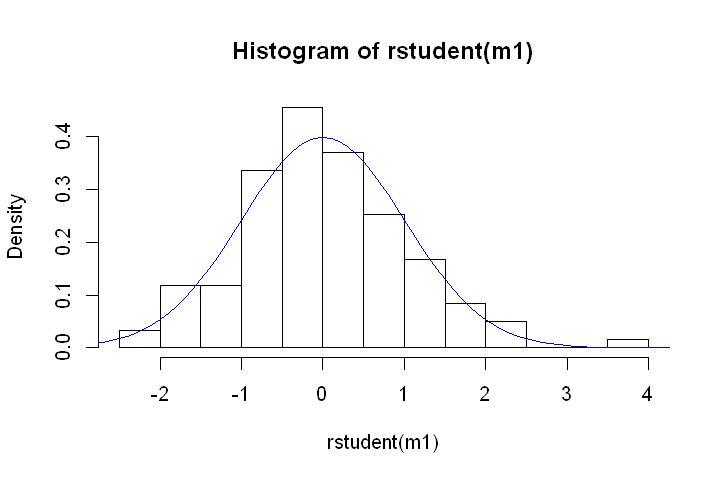

In [24]:
hist(rstudent(m1), freq = F, breaks = 15)
curve(dnorm(x),-5,5,add=T,col="blue")
shapiro.test(rstudent(m1))

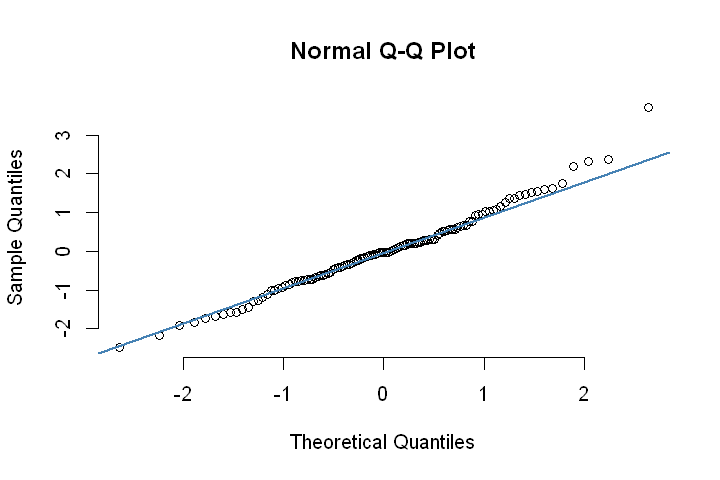

In [25]:
qqnorm(rstudent(m1), pch = 1, frame = FALSE)
qqline(rstudent(m1), col = "steelblue", lwd = 2)

### Resumo

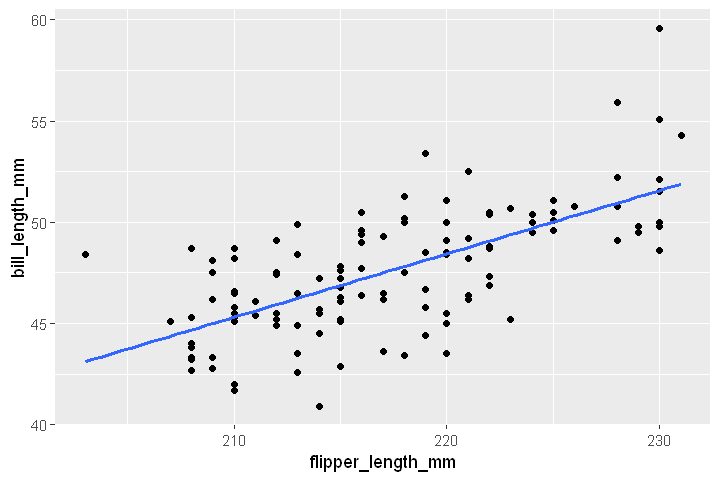

In [26]:
plt1

In [27]:
m1 = lm(bill_length_mm ~ flipper_length_mm, data = Gentoo)
summary(m1)


Call:
lm(formula = bill_length_mm ~ flipper_length_mm, data = Gentoo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6545 -1.5209 -0.0678  1.3123  8.0330 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -20.4879     7.0845  -2.892  0.00457 ** 
flipper_length_mm   0.3133     0.0326   9.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.332 on 117 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.4364 
F-statistic: 92.37 on 1 and 117 DF,  p-value: < 2.2e-16


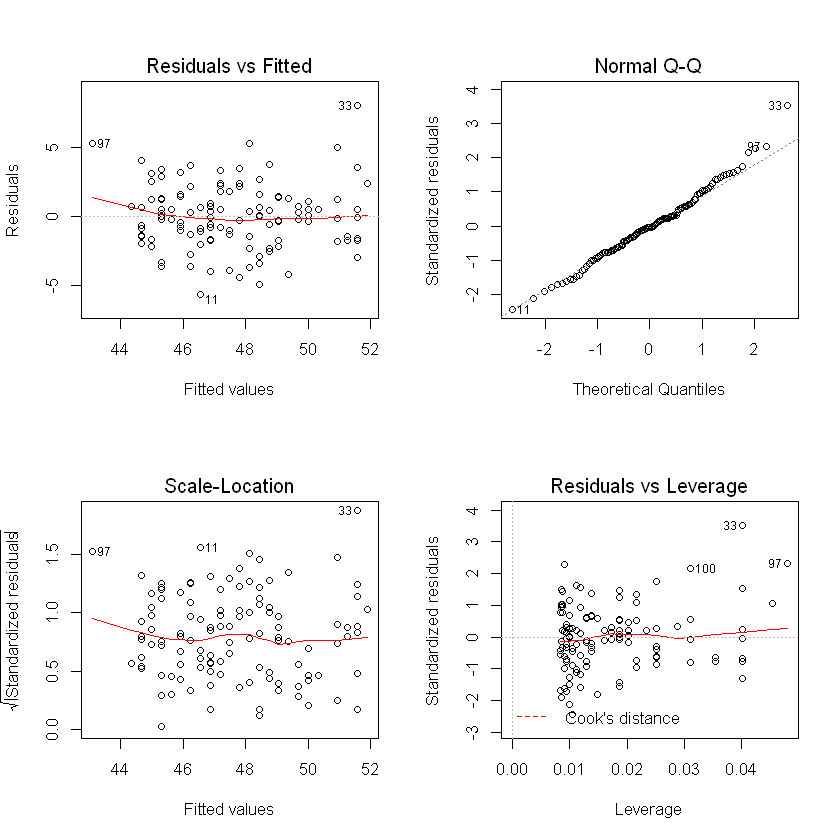

In [28]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow = c(2,2))
plot(m1)

## Regressão Múltipla

Se temos mais de uma variável resposta $X$, o modelo torna-se uma **regressão linear múltipla**. Os coeficientes $\beta_0$,, $\beta_0$, $\cdots$, $\beta_p$, associados a cada variável $X$ são conhecidos como coeficientes parciais de regressão. Assim como na regressão simples, $\beta_0$, se refere ao valor que $Y$ assume se todas as demais variáveis $X's = 0$. Cada coeficiente $\beta_i$, mede a magnitude da mudança em $Y$ para variação de uma unidade em $X_i$ quando *TODAS* as demais variáveis $X$ permanecem constantes.

$$Y_i = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon_i$$

Vamos utilizar o mesmo conjunto de dados `attitude` para ajustar um modelo de regressão múltipla.

In [29]:
data(attitude)
attitude %>% head()

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


Assim como na regressão simples, o primeiro passo envolve a análise gráfica entre a variável resposta e todas as preditoras. O comando pairs pode ser utilizado para vermos rapidamente o padrão de correlação entre as variáveis.

In [30]:
#pairs(attitude)

In [31]:
rm = lm(rating ~  complaints + privileges + learning + raises + critical + advance, data  = attitude)
#rm
summary(rm)


Call:
lm(formula = rating ~ complaints + privileges + learning + raises + 
    critical + advance, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


#### Pressupostos - o problema da colinearidade

Os pressupostos da regressão múltipla são iguais aos da regressão simples com um adicional: **não deve haver colinearidade**. Isto significa que as variáveis preditoras $X$ não podem ser correlacionadas umas às outras. 

Uma forma de verificar este pressuposto passa por um gráfico de dispersão par-a-par entre as variáveis preditoras.


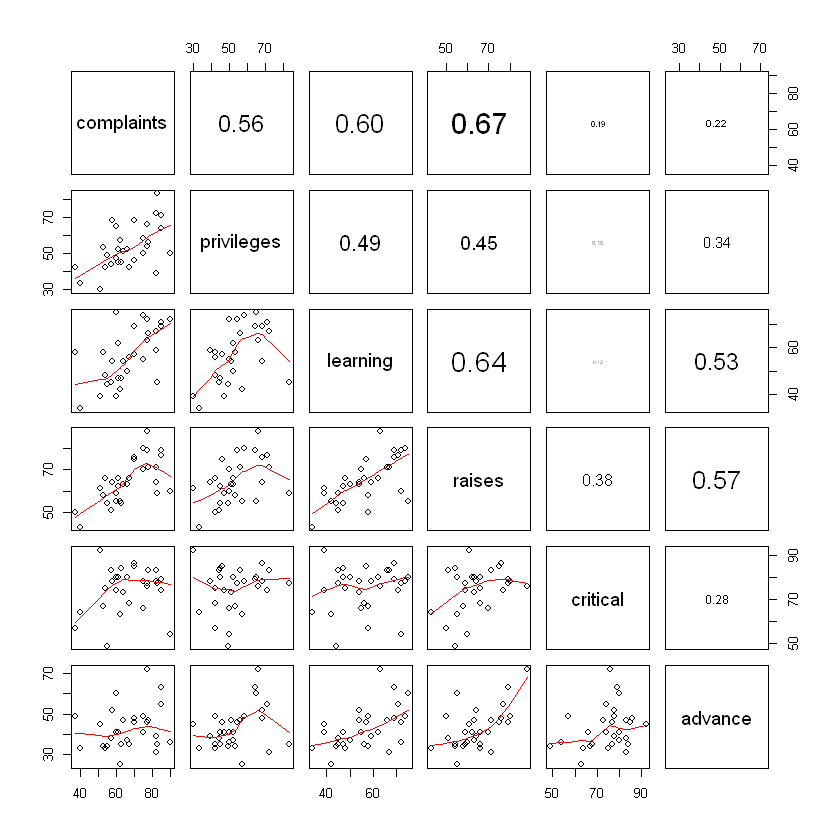

In [32]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}


pairs(attitude[,-1], lower.panel = panel.smooth, upper.panel = panel.cor)

Vejam que algumas variáveis têm correlações moderadas entre si. Por exemplo, a correlação entre complaints *vs raises é $r = 0.67$ e entre learning *vs* raises, $r = 0.64$. Isto pode ser um indício de colinearidade. 

Uma forma de medir o grau de colinearidade de uma variável com as demais é pelo cálculo do **Fator de Inflação de Variância** (**VIF** - Variance Inflation Factor). O VIF mede o quanto a variâncias dos estimadores de regressão aumenta devido a multicolinearidade. 

Seja $X_i$ a variável preditora i, o VIF associado a esta variável tem relação ao $R^2_i$ quando esta é utilizada como resposta em um modelo linear com todas as demais variáveis $X$. Neste caso, $VIF_i$ é calculado por:

$$VIF_i = \frac{1}{(1 -  R^2_i}$$ 

Quanto maior $R^2_i$, maior o grau de multicolinearidade devido à $X_i$.

Vamos calcular o VIF associado a variável complaints.

In [33]:
mcomp = summary(lm(complaints ~ learning + privileges + raises + critical + advance, data  = attitude))
#mcomp
#mcomp$r.squared
Vif.comp = 1/ (1 - mcomp$r.squared)

Vif.comp

[1] 2.66706

O valor de VIF para a variável complaints é 2,667. Veja portanto que o cálculo do VIF para uma determinada variável $X_i$ é obtido encontrando o coeficiente de determinação $R^2_i$ quando esta variável é utilizada como resposta em um modelo com TODAS as demais preditoras.

Na presença de multicolinearidade, os estimadores da regressão tornam-se **instáveis**, i.e. a retirada de uma variável pode alterar os coeficientes das demais.

Vamos ver o que acontece se retirarmos `complaints` de nosso modelo.

In [34]:
rm = lm(rating ~ privileges + critical + advance, data  = attitude)

summary(rm)


Call:
lm(formula = rating ~ privileges + critical + advance, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.0229  -5.0810  -0.6476   5.0387  22.7583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 34.25069   17.97030   1.906   0.0678 .
privileges   0.41490    0.18716   2.217   0.0356 *
critical     0.12260    0.22665   0.541   0.5932  
advance     -0.01931    0.22955  -0.084   0.9336  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.56 on 26 degrees of freedom
Multiple R-squared:  0.1908,	Adjusted R-squared:  0.0974 
F-statistic: 2.043 on 3 and 26 DF,  p-value: 0.1324


Note que outras variáveis passaram a ser significativas como learning (p = 0,0172) e riases (0,0373). Estas estavam entre as variáveis com maior correlação entre si e com complaints.

Todos os $VIF$'s podem ser calculados por uma única operação, calculando a inversa da matriz de correlação $R^{-1}$

In [35]:
attitude %>% 
    select(-rating) %>% 
    cor() %>% 
    solve() %>% 
    diag() %>% 
    round(2)

complaints privileges   learning     raises   critical    advance 
      2.67       1.60       2.27       3.08       1.23       1.95